<center>

# Exercise 2.2

</center>

Compute and visualize as colour maps with isolines (pcolor, contour, contourf) and surfaces (surf, light, lighting) the density ${\rho}$, thermal expansion αand compressibility ${\beta}$ for periclase ${(Fig. 2.1)}$ based on the equations derived for the analytical exercises. Take a temperature interval from 100 to 4000 K and a pressure interval from $10^{9}$ to $10^{11}$ ${Pa}$ (1 to 100 ${GPa}$). Try also to define the Gibbs free energy equation as an external function ${Gm_{(P, T)}}$ and use differences instead of derivatives to compute ${V_{(P, T)}}$, ${\rho_{(P, T)}}$, ${\alpha_{(P, T)}}$ and ${\beta_{(P, T)}}$ :

$$
{\rho_{(P, T)}} = \frac{m}{V_{(P, T)}}
$$

<center> where, </center>

$$

V_{(P, T)} = {(\frac{\delta G_{m(P, T)}}{\delta P})_{T=const}} \approx \frac{\Delta G_{m(P, T)}}{\Delta P} = \frac{G_{m(P + \Delta P, T)} - G_{m(P, T)}}{\Delta P}

$$

$$

\alpha_{(P, T)} = -\frac{1}{\rho_{(P, T)}} \times \frac{\delta \rho_{(P, T)}}{\delta T} \approx -\frac{1}{\rho_{(P, T)}} \times \frac{\Delta \rho_{(P, T)}}{\Delta T} = -\frac{1}{\rho_{(P, T)}} \times \frac{\rho_{(P, T + \Delta T)} - \rho_{(P, T)}}{\Delta T}

$$

$$

\beta_{(P, T)} = \frac{1}{\rho_{(P, T)}} \times \frac{\delta \rho_{(P, T)}}{\delta P} \approx \frac{1}{\rho_{(P, T)}} \times \frac{\Delta \rho_{(P, T)}}{\Delta P} = \frac{1}{\rho_{(P, T)}} \times \frac{\rho_{(P + \Delta P, T)} - \rho_{(P, T)}}{\Delta P}

$$

$\Delta P$ and $\Delta T$ are small increments in pressure and temperature, respectively.

In [149]:
from Gibbs_periclase import Gibbs_MgO
import numpy as np
import matplotlib.pyplot as plt

In [150]:
P_range = np.arange(4, 104, 4)
T_range = np.arange(75, 3075, 75)

In [151]:
G = np.zeros((len(P_range), len(T_range)))
G.shape

(25, 40)

In [171]:
for i, P in enumerate(P_range):
    for j, T in enumerate(T_range):
        G[i, j] =  Gibbs_MgO(P*1e9, T)

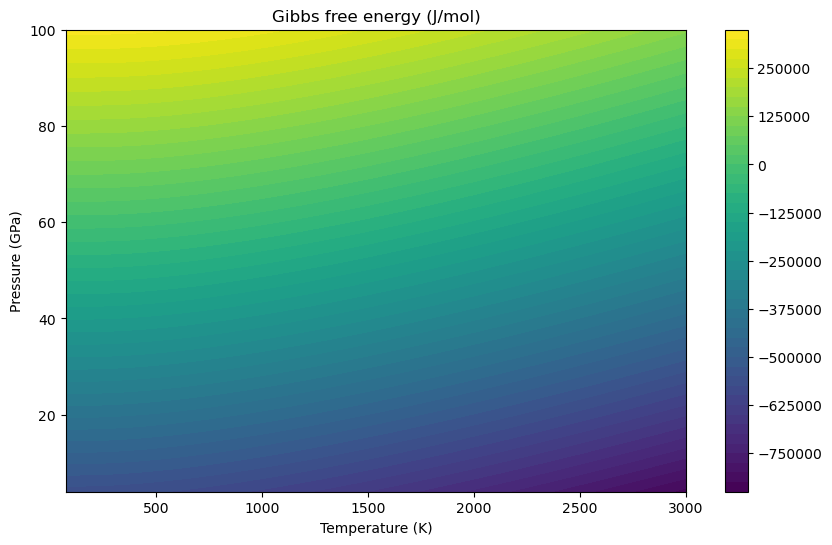

In [173]:
# Plotting
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')
plt.figure(figsize=(10, 6))
plt.contourf(T_grid, P_grid, G, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.title('Gibbs free energy (J/mol)')
plt.show()

In [174]:
m = 0.0403044  # the mass

In [175]:
dT = 1e-4  # small increment for temperature (K)
dP = 1e-4  # small increment for pressure (GPa)

In [176]:
rho = np.zeros((len(P_range), len(T_range)))
rho.shape

(25, 40)

In [177]:
for i, P in enumerate(P_range):
    for j, T in enumerate(T_range):
        # computing molar volume
        V = (Gibbs_MgO((P + dP)*1e9, T) - Gibbs_MgO(P*1e9, T)) / (dP*1e9)
        # Computing densityü
        rho[i, j] = m / V

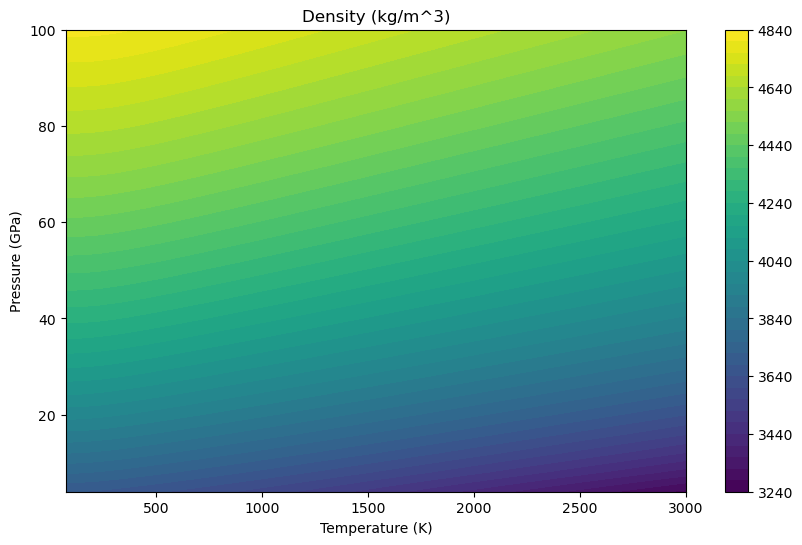

In [179]:
# Plotting
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')
plt.figure(figsize=(10, 6))
plt.contourf(T_grid, P_grid, rho, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.title('Density (kg/m^3)')
plt.show()

In [180]:
alpha = np.zeros((len(P_range), len(T_range)))
alpha.shape

(25, 40)

In [181]:
#thermal expansion for each pressure and temperature
for i, P in enumerate(P_range):
    for j, T in enumerate(T_range):
        # Compute RHO(P,T+dT)
        # Computing molar volume
        V_dT = (Gibbs_MgO((P + dP)*1e9, T+dT) - Gibbs_MgO(P*1e9, T+dT)) / (dP * 1e9)
        # Computing density
        rho_alpha = m / V_dT

        # Compute ALPHA
        alpha[i, j] = -1/(rho[i, j]) * ((rho_alpha - rho[i, j]) / dT)

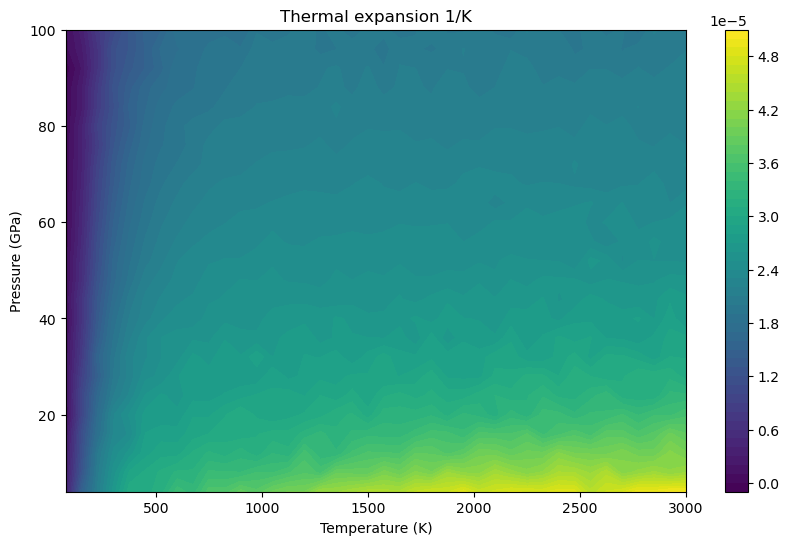

In [183]:
# Plotting
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')
plt.figure(figsize=(10, 6))
plt.contourf(T_grid, P_grid, alpha, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.title('Thermal expansion 1/K')
plt.show()

In [185]:
beta = np.zeros((len(P_range), len(T_range)))
beta.shape

(25, 40)

In [186]:
for i, P in enumerate(P_range):
    for j, T in enumerate(T_range):
        # Compute RHO(P1,T)
        # Computing molar volume
        V_dP = (Gibbs_MgO(((P + dP) + dP)*1e9, T) - Gibbs_MgO((P + dP)*1e9, T)) / (dP*1e9)
        # Computing density
        rho_b = m / V_dP

        # beta
        beta[i, j] = 1/(rho[i, j]) * ((rho_b - rho[i, j]) / (dP*1e9))

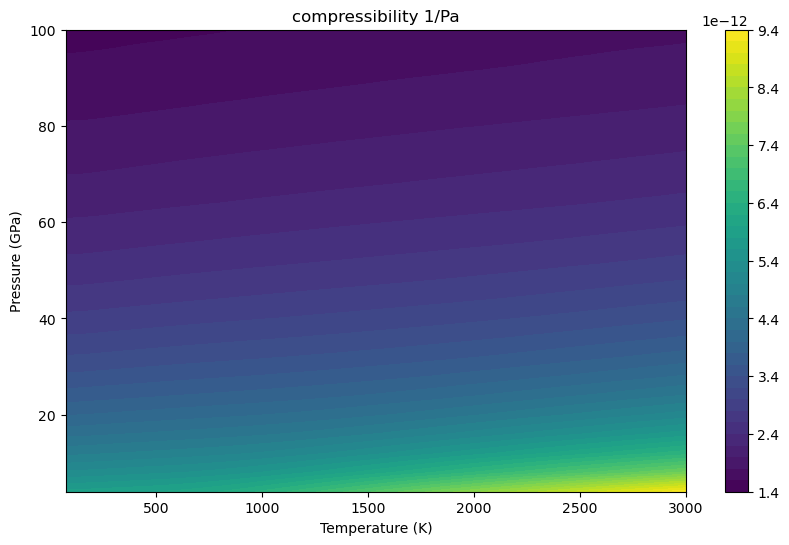

In [188]:
# Plotting
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')
plt.figure(figsize=(10, 6))
plt.contourf(T_grid, P_grid, beta, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.title('compressibility 1/Pa')
plt.show()

3d

In [189]:
from mpl_toolkits.mplot3d import Axes3D

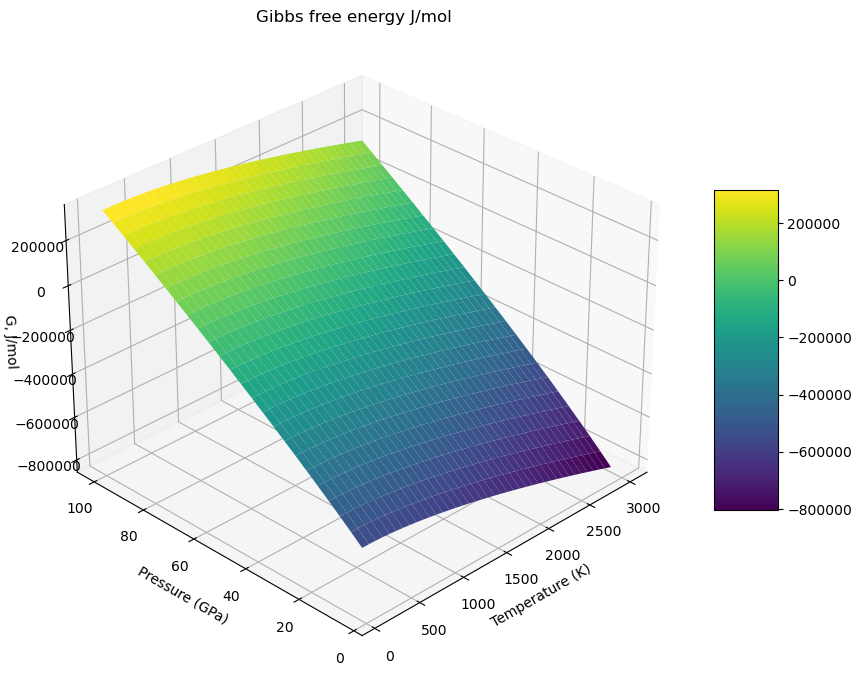

In [192]:
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')

# fig
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plotting Gibbs beleş enerji
surf = ax.plot_surface(T_grid, P_grid, G, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Gibbs free energy J/mol')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (GPa)')
ax.set_zlabel('G, J/mol')
# axis properties
ax.tick_params(axis='both', direction='out', width=1.5)
ax.grid(True)
ax.view_init(elev=30, azim=225)

plt.show()

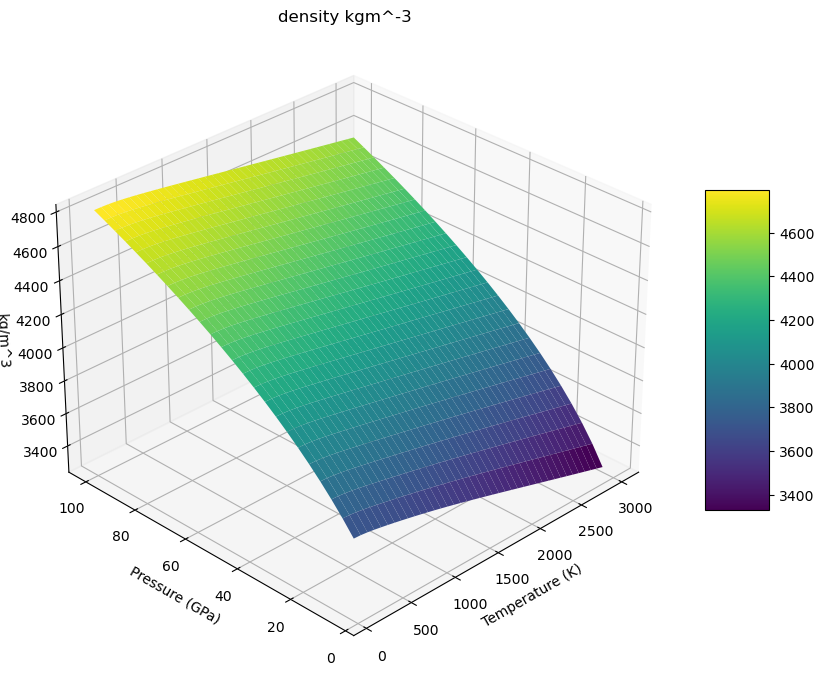

In [196]:
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')

# fig
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plotting density
surf = ax.plot_surface(T_grid, P_grid, rho, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('density kgm^-3')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (GPa)')
ax.set_zlabel('kg/m^3')
# axis properties
ax.tick_params(axis='both', direction='out', width=1.5)
ax.grid(True)
ax.view_init(elev=30, azim=225)

plt.show()

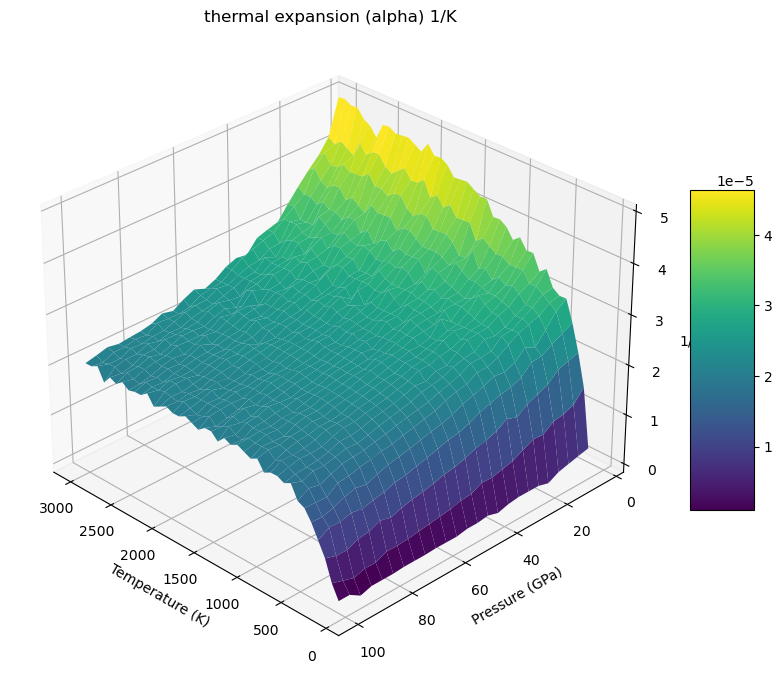

In [201]:
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')

# fig
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plotting Gibbs beleş enerji
surf = ax.plot_surface(T_grid, P_grid, alpha, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('thermal expansion (alpha) 1/K')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (GPa)')
ax.set_zlabel('1/K')
# axis properties
ax.tick_params(axis='both', direction='out', width=1.5)
ax.grid(True)
ax.view_init(elev=30, azim=135)

plt.show()

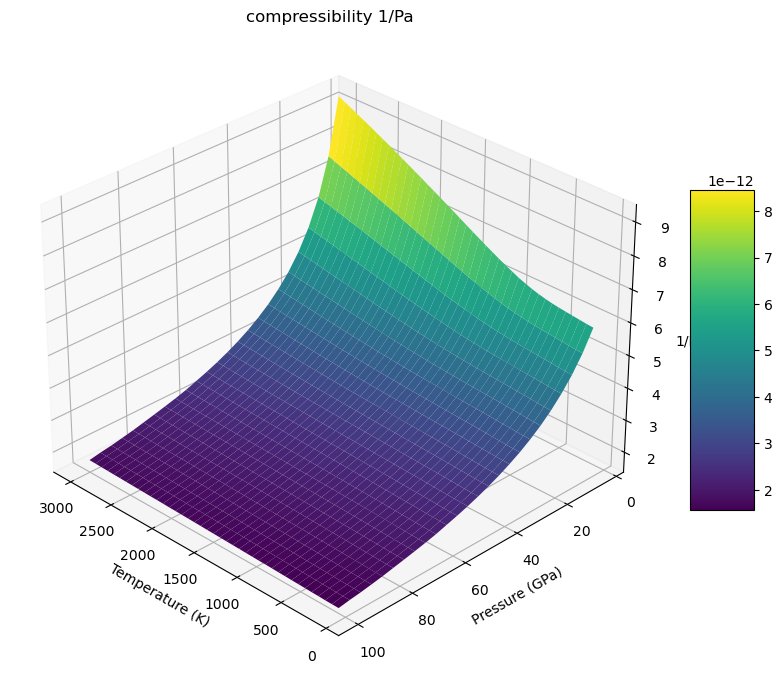

In [200]:
P_grid, T_grid = np.meshgrid(P_range, T_range, indexing='ij')

# fig
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plotting Gibbs beleş enerji
surf = ax.plot_surface(T_grid, P_grid, beta, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('compressibility 1/Pa')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (GPa)')
ax.set_zlabel('1/Pa')
# axis properties
ax.tick_params(axis='both', direction='out', width=1.5)
ax.grid(True)
ax.view_init(elev=30, azim=135)

plt.show()